In [1]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [2]:
base_dir = "/data/projects/DNABERT_snv/Manuscript_11_2023/ICGC_output/DNABERT_data/donor/"

In [3]:
output_path = "/data/projects/DNABERT_snv/Manuscript_11_2023/ICGC_output/Varaiant_Analysis_Data/donor"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [4]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [5]:
df_dict = {}
df_list = []
pred_probab = np.load(base_dir+"Prediction_result/pred_results.npy")
print(len(pred_probab))
df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
print(df.shape)
Reference_probab = pred_probab[::2]
Alternative_probab = pred_probab[1::2]
df['Ref_probab']=Reference_probab
df['Alt_probab']=Alternative_probab
df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)

11566792
(5783396, 11)


In [6]:
df

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,chr7,+,127588526-127588605,ENST00000000233,MU80692579,127588529,127588530,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCTGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.997893,-5.655503e-04,0.452517
1,chr7,+,127588526-127588605,ENST00000000233,MU90753368,127588553,127588554,G,A,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCAGATTCTCATGGGTGAGGC...,0.998459,0.998403,-5.647766e-05,0.052101
2,chr7,+,127588526-127588605,ENST00000000233,MU115107606,127588569,127588570,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGATGC...,0.998459,0.997675,-7.832481e-04,0.594888
3,chr7,+,127588526-127588605,ENST00000000233,MU84868698,127588581,127588582,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.998200,-2.587617e-04,0.224679
4,chr7,+,127588526-127588605,ENST00000000233,MU83704948,127588591,127588592,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.998257,-2.016889e-04,0.178035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783391,chr17,-,63710688-63710767,ENST00000640999,MU28664773,63710752,63710753,C,A,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.043743,-6.375073e-04,0.355115
5783392,chr17,-,63710688-63710767,ENST00000640999,MU29299841,63710760,63710761,C,T,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.053945,-7.357776e-05,0.037198
5783393,chr17,-,63710688-63710767,ENST00000640999,MU129502912,63710765,63710766,T,C,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.061436,3.784833e-04,-0.161884
5783394,chr17,-,63713366-63713445,ENST00000640999,MU84546198,63713396,63713397,G,T,CCCACCCTCCCTCCATGTGACACACTCATGGTTTATTACCTGCAAG...,CCCACCCTCCCTCCATGTGACACACTCATGTTTTATTACCTGCAAG...,0.003318,0.003223,-3.149222e-07,0.042000


In [7]:
df.to_csv(output_path+"/Donor_raw_SNV.tsv", sep= "\t", index=False)

In [43]:
df= df.drop_duplicates().reset_index(drop=True)
df

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,chr7,+,127588526-127588605,ENST00000000233,MU80692579,127588529,127588530,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCTGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.997893,-5.655503e-04,0.452517
1,chr7,+,127588526-127588605,ENST00000000233,MU90753368,127588553,127588554,G,A,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCAGATTCTCATGGGTGAGGC...,0.998459,0.998403,-5.647766e-05,0.052101
2,chr7,+,127588526-127588605,ENST00000000233,MU115107606,127588569,127588570,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGATGC...,0.998459,0.997675,-7.832481e-04,0.594888
3,chr7,+,127588526-127588605,ENST00000000233,MU84868698,127588581,127588582,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.998200,-2.587617e-04,0.224679
4,chr7,+,127588526-127588605,ENST00000000233,MU83704948,127588591,127588592,G,T,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,CGCGGATCTTCGGGAAGAAGCAGATGCGGATTCTCATGGGTGAGGC...,0.998459,0.998257,-2.016889e-04,0.178035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783391,chr17,-,63710688-63710767,ENST00000640999,MU28664773,63710752,63710753,C,A,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.043743,-6.375073e-04,0.355115
5783392,chr17,-,63710688-63710767,ENST00000640999,MU29299841,63710760,63710761,C,T,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.053945,-7.357776e-05,0.037198
5783393,chr17,-,63710688-63710767,ENST00000640999,MU129502912,63710765,63710766,T,C,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,CCAATAACCCCTTTCTACCAAGAACCCTTTCCCACTCACCGTATGC...,0.055276,0.061436,3.784833e-04,-0.161884
5783394,chr17,-,63713366-63713445,ENST00000640999,MU84546198,63713396,63713397,G,T,CCCACCCTCCCTCCATGTGACACACTCATGGTTTATTACCTGCAAG...,CCCACCCTCCCTCCATGTGACACACTCATGTTTTATTACCTGCAAG...,0.003318,0.003223,-3.149222e-07,0.042000


In [44]:
df[['chr','Donor_coordinates']].drop_duplicates()

,chr,Donor_coordinates
0,chr7,127588526-127588605
5,chr7,127589555-127589634
12,chr7,127591049-127591128
17,chr7,127591661-127591740
20,chr7,127590098-127590177
...,...,...
5783023,chr1,84370343-84370422
5783026,chr4,82297495-82297574
5783031,chr4,82320446-82320525
5783135,chr5,162154973-162155052


In [45]:
df[['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates()

,Mutation_ID,varinat_start,variant_end
0,MU80692579,127588529,127588530
1,MU90753368,127588553,127588554
2,MU115107606,127588569,127588570
3,MU84868698,127588581,127588582
4,MU83704948,127588591,127588592
...,...,...,...
5783033,MU67169954,82320516,82320517
5783135,MU112688058,162154992,162154993
5783136,MU70975881,162154996,162154997
5783233,MU37774162,160491630,160491631


In [46]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = df[(df['Ref_probab'] >= 0.5) & (df['Alt_probab'] < 0.5)]
#filtered_df2 = df[(df['Ref_probab'] < 0.5) & (df['Alt_probab'] > 0.5)]
df_interest = filtered_df1
df_interest 

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
73,chr12,+,2797832-2797911,ENST00000001008,MU5033497,2797843,2797845,TC,T,CCTCCAAAGATTCCCCCCAATGCCACGCTTGTATTTGAGGTGAGTG...,CCTCCAAAGATTCCCCCAATGCCACGCTTGTATTTGAGGTGAGTGT...,0.992869,0.153562,-0.833322,9.583951
88,chr12,+,2800538-2800617,ENST00000001008,MU131889214,2800576,2800577,G,C,CTACAGGCCTTCTCTGCTGCCATTGAAAGCTGTAACAAGGTGAGGC...,CTACAGGCCTTCTCTGCTGCCATTGAAAGCTGTAACAACGTGAGGC...,0.964617,0.306017,-0.635297,5.950128
128,chr2,-,72143949-72144028,ENST00000001146,MU85827592,72143963,72143964,G,T,GGGAGGGATTGCGCGGAAGAAAACGGGCAGAGTTCTTACCTTGCGC...,GGGAGGGATTGCGCTGAAGAAAACGGGCAGAGTTCTTACCTTGCGC...,0.659756,0.431912,-0.150322,1.350742
130,chr2,-,72143949-72144028,ENST00000001146,MU129667051,72143988,72143989,C,A,GGGAGGGATTGCGCGGAAGAAAACGGGCAGAGTTCTTACCTTGCGC...,GGGAGGGATTGCGCGGAAGAAAACGGGCAGAGTTCTTACATTGCGC...,0.659756,0.338882,-0.211698,1.919486
140,chr2,-,72134721-72134800,ENST00000001146,MU52359135,72134740,72134741,GG,AA,GTGCTGGTGCTGCCCGTGAGGGGCACACGCCCACCCCACCTTCAGC...,GTGCTGGTGCTGCCCGTGAAAGGGCACACGCCCACCCCACCTTCAG...,0.821039,0.405282,-0.341353,2.751086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783285,chr20,+,45420184-45420263,ENST00000640996,MU1827143,45420205,45420206,C,T,TTGTATTTGATGCCTTCATCACGGGGCAGGGAAAGAAAGGTAAGTT...,TTGTATTTGATGCCTTCATCATGGGGCAGGGAAAGAAAGGTAAGTT...,0.551069,0.386065,-0.090929,0.964983
5783290,chr20,+,45420184-45420263,ENST00000640996,MU94201780,45420232,45420233,C,G,TTGTATTTGATGCCTTCATCACGGGGCAGGGAAAGAAAGGTAAGTT...,TTGTATTTGATGCCTTCATCACGGGGCAGGGAAAGAAAGGTAAGTT...,0.551069,0.384144,-0.091987,0.976683
5783291,chr20,+,45420184-45420263,ENST00000640996,MU82840541,45420240,45420241,C,G,TTGTATTTGATGCCTTCATCACGGGGCAGGGAAAGAAAGGTAAGTT...,TTGTATTTGATGCCTTCATCACGGGGCAGGGAAAGAAAGGTAAGTT...,0.551069,0.413457,-0.075833,0.800236
5783319,chr20,+,45416655-45416734,ENST00000640996,MU82482288,45416673,45416674,G,T,TGCAGAGCTGTGGGTCTGGTTCCAAGACACTGTCACTGAGTGAGTG...,TGCAGAGCTGTGGGTCTGTTTCCAAGACACTGTCACTGAGTGAGTG...,0.804348,0.221732,-0.468626,3.850979


In [47]:
df_interest [['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates()

,Mutation_ID,varinat_start,variant_end
73,MU5033497,2797843,2797845
88,MU131889214,2800576,2800577
128,MU85827592,72143963,72143964
130,MU129667051,72143988,72143989
140,MU52359135,72134740,72134741
...,...,...,...
5777894,MU81648379,205074042,205074043
5779427,MU32049529,165208262,165208263
5779430,MU41135590,165208301,165208302
5782117,MU129277190,6498239,6498240


In [48]:
df_interest[['chr','Donor_coordinates']].drop_duplicates()

,chr,Donor_coordinates
73,chr12,2797832-2797911
88,chr12,2800538-2800617
128,chr2,72143949-72144028
140,chr2,72134721-72134800
167,chr2,37242654-37242733
...,...,...
5777730,chr17,63707211-63707290
5777894,chr1,205074003-205074082
5779427,chr2,165208226-165208305
5782117,chr11,6498200-6498279


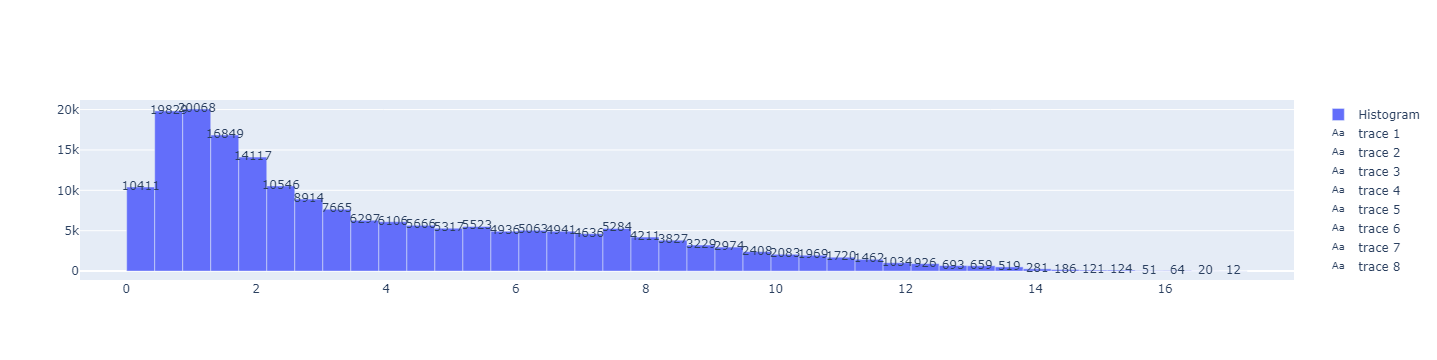

In [49]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

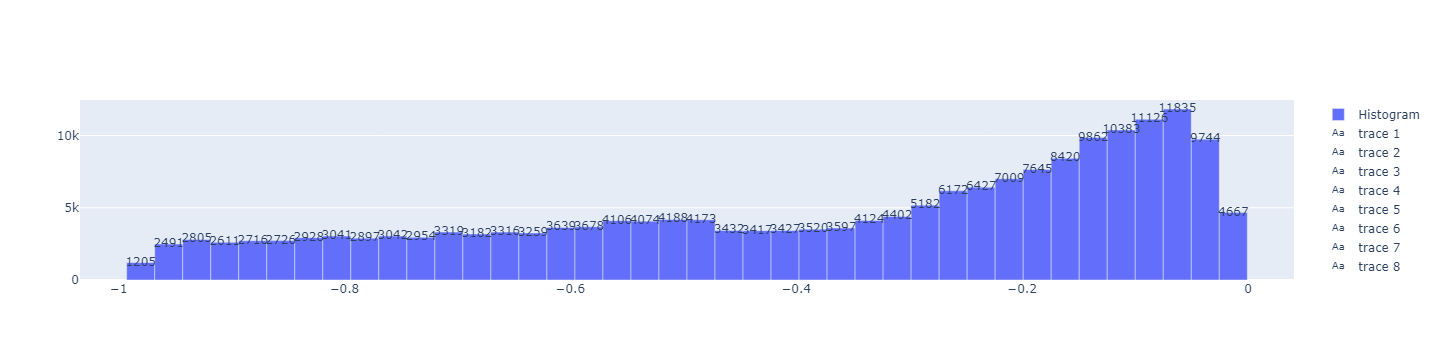

In [50]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [51]:
df_interest = df_interest[(df_interest['ScoreChange']>0.75)|(df_interest['ScoreChange']<-0.75)]
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
73,chr12,+,2797832-2797911,ENST00000001008,MU5033497,2797843,2797845,TC,T,CCTCCAAAGATTCCCCCCAATGCCACGCTTGTATTTGAGGTGAGTG...,CCTCCAAAGATTCCCCCAATGCCACGCTTGTATTTGAGGTGAGTGT...,0.992869,0.153562,-0.833322,9.583951
187,chr2,+,37241752-37241831,ENST00000002125,MU115229924,37241762,37241763,G,GACGGCGACC,CAATTTCCTGGTACCGAGATCTGCACGATGTTCCAAAAGGTAATTA...,CAATTTCCTGGACGGCGACCTACCGAGATCTGCACGATGTTCCAAA...,0.996401,0.187815,-0.805677,10.225659
258,chr3,+,50183216-50183295,ENST00000002829,MU121236376,50183244,50183248,ACCT,A,GAGGAACCCTGTCATTTACGCTGTCTTTACCTCCTCTGGGTGAGGC...,GAGGAACCCTGTCATTTACGCTGTCTTTACCTCTGGGTGAGGCTGG...,0.934269,0.051010,-0.825202,8.046739
387,chr7,+,117665525-117665604,ENST00000003084,MU121288363,117665566,117665567,G,T,CACAGGATAGAAGCAATGCTGGAATGCCAACAATTTTTGGTGAGTC...,CACAGGATAGAAGCAATGCTGGAATGCCAACAATTTTTGGTTAGTC...,0.996652,0.236595,-0.757513,9.907757
463,chr7,+,117548784-117548863,ENST00000003084,MU9604176,117548785,117548789,AGTT,A,CAGTTGTTGGCGGTTGCTGGATCCACTGGAGCAGGCAAGGTAGTTC...,CAGTTGGCGGTTGCTGGATCCACTGGAGCAGGCAAGGTAGTTCTTT...,0.932159,0.035944,-0.835415,8.525640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782221,chr11,-,31801521-31801600,ENST00000640963,MU122532353,31801559,31801560,C,CCTTGGTATGTTAT,GCTTAGGGCAGGGAGGGCAGATGTTCTCAATGAACTTACGCTTGGT...,GCTTAGGGCAGGGAGGGCAGATGTTCTCAATGAACTTACCTTGGTA...,0.904023,0.029055,-0.790991,8.298147
5782783,chr11,-,31801521-31801600,ENST00000640975,MU122532353,31801559,31801560,C,CCTTGGTATGTTAT,GCTTAGGGCAGGGAGGGCAGATGTTCTCAATGAACTTACGCTTGGT...,GCTTAGGGCAGGGAGGGCAGATGTTCTCAATGAACTTACCTTGGTA...,0.904023,0.029055,-0.790991,8.298147
5783027,chr4,+,82295748-82295827,ENST00000640984,MU128899559,82295787,82295788,G,A,GCTTTGGATTCTGTGACACCATCTGCATTTCTTAAAAACGTAAGTA...,GCTTTGGATTCTGTGACACCATCTGCATTTCTTAAAAACATAAGTA...,0.993695,0.061732,-0.926087,11.226137
5783052,chr5,+,162095523-162095602,ENST00000640985,MU85842507,162095562,162095563,G,T,TATGTGAATAGCATTGGTCCAGTGAACGCTATCAATATGGTGAGTT...,TATGTGAATAGCATTGGTCCAGTGAACGCTATCAATATGTTGAGTT...,0.993324,0.060809,-0.926290,11.166274


In [52]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])
# df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
# df_interest

In [53]:
# df_interest = df_interest[df_interest['variant_length']==1]
# df_interest

In [54]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

9.820861917165008 1.985461200120837


In [55]:
max(df_interest['LogOddRatio'])

17.26585598846753

In [56]:
min(df_interest['LogOddRatio'])

6.572321113615615

3.864478316802497 15.777245517527518


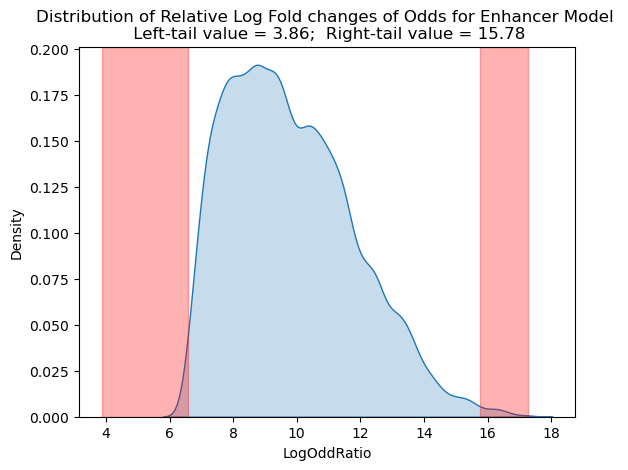

In [57]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
x1, x2 = mean + 3*std, mean - 3*std
# x1= 3.3219280948873626
# x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for Enhancer Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig(output_path+ '/Enhancer_LogOddRatio_Distribution.png')
plt.show()

In [58]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [59]:
df_selected

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
80154,chr6,+,89846605-89846684,ENST00000237177,MU112762718,89846605,89846606,A,ACAATGGT,ACAATGGTGATGGAACAAGTTTATTTGATGTCTTTTCTGGTAAGAG...,ACAATGGTCAATGGTGATGGAACAAGTTTATTTGATGTCTTTTCTG...,0.995746,0.002268,-0.989252,16.651881
99238,chr19,+,45523656-45523735,ENST00000245932,MU40294919,45523664,45523679,GGAGAAAACCCCCAA,G,CAAGTTGGGGAGAAAACCCCCAAGGATGAATCTGCCAATGTAAGTC...,CAAGTTGGGGGATGAATCTGCCAATGTAAGTCAGGGACTCTTCTTG...,0.993104,0.002008,-0.984261,16.127124
131586,chr7,+,55401281-55401360,ENST00000254770,MU91614416,55401282,55401300,CCCATGGCATGGCTGGAA,C,GCCCATGGCATGGCTGGAATTTACTATATGTTAATGCAGGTAGGTA...,GCTTTACTATATGTTAATGCAGGTAGGTAAGAATACTCTTACACAC...,0.987727,0.001431,-0.974191,15.777251
162155,chr15,+,45673762-45673841,ENST00000260324,MU91612419,45673769,45673771,TC,T,CAGAAGATCATGTACTTATCAGAAGCCTACTTCAGGAAGGTATGCT...,CAGAAGATATGTACTTATCAGAAGCCTACTTCAGGAAGGTATGCTT...,0.997100,0.003181,-0.991037,16.717244
187776,chr8,+,2045129-2045208,ENST00000262113,MU2987044,2045132,2045135,TTC,T,GAATTCTCTCTCCTCCTTGCAATTTTCCTTTCTGTCTGGGTAAGTG...,GAATTCTCTCCTCCTTGCAATTTTCCTTTCTGTCTGGGTAAGTGTC...,0.996817,0.003908,-0.989749,16.284544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115099,chr19,+,45523656-45523735,ENST00000588463,MU40294919,45523664,45523679,GGAGAAAACCCCCAA,G,CAAGTTGGGGAGAAAACCCCCAAGGATGAATCTGCCAATGTAAGTC...,CAAGTTGGGGGATGAATCTGCCAATGTAAGTCAGGGACTCTTCTTG...,0.993104,0.002008,-0.984261,16.127124
5115410,chr19,+,45523656-45523735,ENST00000588482,MU40294919,45523664,45523679,GGAGAAAACCCCCAA,G,CAAGTTGGGGAGAAAACCCCCAAGGATGAATCTGCCAATGTAAGTC...,CAAGTTGGGGGATGAATCTGCCAATGTAAGTCAGGGACTCTTCTTG...,0.993104,0.002008,-0.984261,16.127124
5291028,chr2,+,216520735-216520814,ENST00000598925,MU91614836,216520764,216520767,GAA,G,CTCCATGAACTCTGCTAATGGAAGACGAGGAAAAGGCAGGTAAGTG...,CTCCATGAACTCTGCTAATGGAAGACGAGGAAGGCAGGTAAGTGAA...,0.998950,0.011350,-0.986564,16.339163
5509853,chr15,+,95990845-95990924,ENST00000619812,MU91744756,95990858,95990872,AAAGGCTCAAGAAG,A,GCTGCACCTTTCAAAAGGCTCAAGAAGACATTGATTCAAGTAAGTG...,GCTGCACCTTTCAAACATTGATTCAAGTAAGTGCCACATTTTTAAA...,0.998062,0.005469,-0.990669,16.514793


In [60]:
df_selected[['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates()

,Mutation_ID,varinat_start,variant_end
80154,MU112762718,89846605,89846606
99238,MU40294919,45523664,45523679
131586,MU91614416,55401282,55401300
162155,MU91612419,45673769,45673771
187776,MU2987044,2045132,2045135
265573,MU91606105,48380073,48380106
347364,MU64922598,77241867,77241870
395713,MU4878623,73416339,73416365
418607,MU30300932,124806913,124806921
514021,MU128809731,13922185,13922222


In [61]:
df_selected[['chr','Donor_coordinates']].drop_duplicates()

,chr,Donor_coordinates
80154,chr6,89846605-89846684
99238,chr19,45523656-45523735
131586,chr7,55401281-55401360
162155,chr15,45673762-45673841
187776,chr8,2045129-2045208
265573,chr13,48380045-48380124
347364,chr7,77241861-77241940
395713,chr4,73416314-73416393
418607,chr10,124806882-124806961
514021,chr16,13922172-13922251


In [62]:
df_selected.to_csv(output_path+"/Donor_candidate_variants.tsv", sep= "\t", index=False)
df_selected[['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates().reset_index(drop=True).to_csv(output_path+"/Unique_ICGC_variants_ID.tsv" ,  sep= "\t", index=False)
df_selected[['chr','Donor_coordinates']].drop_duplicates().reset_index(drop=True).to_csv(output_path + "/Unique_Donors_variants.tsv", sep="\t", index=False)

In [63]:
df_SNP = df_selected[(df_selected['ref_neucleotide'].str.len() < 2) & 
                          (df_selected['alternative_neucleotide'].str.len() < 2)]

In [64]:
df_SNP

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Mutation_ID,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio


In [65]:
df_SNP[['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates()

,Mutation_ID,varinat_start,variant_end


In [66]:
df_SNP[['chr','Donor_coordinates']].drop_duplicates()

,chr,Donor_coordinates


In [67]:
df_SNP.to_csv(output_path+"/Donor_candidates_SNP.tsv", sep= "\t", index=False)
df_SNP[['Mutation_ID', 'varinat_start','variant_end']].drop_duplicates().reset_index(drop=True).to_csv(output_path+"/Unique_ICGC_SNP_ID.tsv" ,  sep= "\t", index=False)
df_SNP[['chr','Donor_coordinates']].drop_duplicates().reset_index(drop=True).to_csv(output_path + "/Unique_Donors_SNP.tsv", sep="\t", index=False)